In [1]:
import os
os.chdir('..')
from bilevel.synth_datagen import SynthGenLinear

In [ ]:
# os.chdir('folktables-experiments/multidecomp/')
!pwd

/Users/krishna/Documents/Research/Simultaneous Classifier/folktables-experiments/multidecomp


In [ ]:
import numpy as np
import pandas as pd

- Each feature $x$ generated from some fixed distribution, e.g. uniform $[0, 1]^d$
- Each group label is linearly realizable i.e. its $w_g^\top x$
- Idea to generate different models for different groups
Sample $w_1, \ldots w_{|G|}$ from a Multivariate uniform with high variance $U[0,1]^n$; fix these to be the true regressors, with perhaps some small noise, i.e. $y_g = w_g^\top x + noise$
- A_t is generated by non atomic discrete prob, see section outline

In [4]:
params = {'samples': 100000, 'dim':20, 
        'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
        'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
        'feat_lo': 0.0, 'feat_hi': 1.0, 'w_lo': 0.0, 'w_hi': 1.0,
        'add_linear_mapping': True, 'add_quad_mapping' : True, 
        'S_lo': 0.0, 'S_hi':0.1,
        'label_noise_width':0, 'drop_sensitive':False
        }

# params = {'samples': 100000, 'dim':20, 
#         'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
#         'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
#         'feat_lo': 0.0, 'feat_hi': 1.0, 'w_lo': 0.0, 'w_hi': 100.0, 
#         'label_noise_width':100, 'drop_sensitive':False
#         }
syn_ob = SynthGenLinear(**params)

In [5]:
syn_ob.df.shape

(100000, 40)

In [8]:
# syn_ob.df[['active_labels', 'bin_masked_labels']]
df = syn_ob.df

In [7]:
# df.at[0, 'bin_masked_labels']

In [25]:
# df.at[0, 'bin_masked_labels'][df.iloc[0][filter_group].to_numpy(dtype=int)]
# # df.iloc[0][filter_group].to_numpy() 

array([0.        , 5.01504195, 5.01504195, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [11]:
# df['y_min_active']  = None
# df['y_max_active']  = None
# df['y_mean_active'] = None
# for t in tqdm(df.shape[0]):
#     df.at[t, 'bin_masked_labels']

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,g_native-am,y_male,y_female,y_white,y_black,y_two-or-more,y_some-other,y_asian,y_native-am,bin_masked_labels
0,0.021101,0.048843,0.503807,0.925811,0.607485,0.204030,0.594661,0.142159,0.212296,0.805752,...,0.0,5.707331,5.015042,4.749180,5.810647,4.957869,4.295972,6.790206,4.205119,"[0.0, 5.015041947416718, 4.74917968315033, 0.0..."
1,0.194693,0.758476,0.513716,0.542126,0.164962,0.829043,0.085546,0.040969,0.076270,0.137665,...,0.0,4.340822,3.604837,5.142846,4.649755,4.659066,4.414555,5.856386,4.386171,"[4.340822072206083, 0.0, 5.1428458415876905, 0..."
2,0.132580,0.687575,0.045338,0.224224,0.593012,0.645891,0.475870,0.732734,0.018113,0.862058,...,0.0,5.389552,4.980264,4.260806,5.008643,3.885181,4.332804,6.111310,4.156508,"[0.0, 4.980264108802421, 0.0, 0.0, 3.885180996..."
3,0.263610,0.364464,0.962148,0.737035,0.994308,0.943035,0.950497,0.635553,0.194987,0.699862,...,0.0,6.284415,5.888074,4.655343,6.197971,5.641276,5.093320,7.417186,4.885614,"[6.2844154428115075, 0.0, 4.65534272948857, 0...."
4,0.222535,0.034571,0.858904,0.653514,0.268277,0.893371,0.960454,0.357854,0.508265,0.094741,...,0.0,6.124865,5.008426,5.966534,6.013866,6.544182,5.176448,6.717648,4.606160,"[6.124864523269391, 0.0, 5.966534384105936, 0...."


In [9]:
filter_feature = [col for col in df if col.startswith('x')]
filter_label = [col for col in df if col.startswith('y')]
filter_group = [col for col in df if col.startswith('g')]
print(filter_feature, filter_label, filter_group)

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19'] ['y_male', 'y_female', 'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian', 'y_native-am', 'y_mean_active', 'y_min_active', 'y_max_active', 'y_dperm_active'] ['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']


In [10]:
df.columns

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more',
       'g_some-other', 'g_asian', 'g_native-am', 'y_male', 'y_female',
       'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian',
       'y_native-am', 'y_mean_active', 'y_min_active', 'y_max_active',
       'y_dperm_active'],
      dtype='object')

In [ ]:
# syn_ob.all_groupnames[[syn_ob.dperm]]
print(type(syn_ob.dperm), syn_ob.dperm, syn_ob.all_groupnames)
np.array(syn_ob.all_groupnames)[syn_ob.dperm]

<class 'numpy.ndarray'> [0 7 1 3 6 4 5 2] ['male', 'female', 'white', 'black', 'two-or-more', 'some-other', 'asian', 'native-am']


array(['male', 'native-am', 'female', 'black', 'asian', 'two-or-more',
       'some-other', 'white'], dtype='<U11')

In [7]:
df[:20][filter_group+filter_label]

NameError: name 'df' is not defined

In [17]:
# df['active_labels']

In [18]:
# df['y_min_active'] = df.apply(lambda x: np.min(x['active_labels']), axis=1)
# df['y_max_active'] = df.apply(lambda x: np.max(x['active_labels']), axis =1)
# df['y_mean_active'] = df.apply(lambda x: np.mean(x['active_labels']), axis =1)


In [8]:
df.columns

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more',
       'g_some-other', 'g_asian', 'g_native-am', 'y_male', 'y_female',
       'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian',
       'y_native-am', 'y_mean_active', 'y_min_active', 'y_max_active',
       'y_dperm_active'],
      dtype='object')

In [44]:
# df = pd.read_pickle('./synthetic_res_models/dataframes/goodw0-1_X0-1_linear_racediff.pkl')

# Even though labels for each group are realizable by linear, their combination is not linear!
Single linear learner unable to capture this, and as expected cannot get a perfect r2

In [11]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_mean_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for mean of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.9869439055908685 0.9868914998551274


In [12]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_min_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for min of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.9820689160589916 0.9817118405150236


In [13]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_max_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for max of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.9838933913834379 0.9841151793808183


In [14]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_dperm_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for max of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.9818442936040483 0.981988647676094


# Batch comparing models across different groups, are they similar or not
- use model trained on data for one group, test it on data of another (test its r2 score on data of other)

In [15]:
y_all = [col for col in df if col.startswith('y')]
print(np.all(y_all==filter_label))
print(filter_group)
print(filter_feature)

True
['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']
['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19']


In [38]:
df.columns

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more',
       'g_some-other', 'g_asian', 'g_native-am', 'y_male', 'y_female',
       'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian',
       'y_native-am', 'y_mean_active', 'y_min_active', 'y_max_active',
       'y_dperm_active'],
      dtype='object')

In [18]:
# tranining on data for only each group
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df.drop(filter_label, axis = 1), 
                                                    df['y_dperm_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)

models_lr_dict = {}
group_sizes = {}

for g in filter_group:
    indices = (X_train[g] == 1)
    model_lr = LinearRegression()
    model_lr.fit(X_train[indices][filter_feature], y_train[indices])
    key = g
    group_sizes[key] = indices.sum() #sum of all the trues
    models_lr_dict[key] = model_lr

In [19]:
for g in filter_group:
    indices = (X_test[g] == 1)
    key = g
    r2_score_lr = models_lr_dict[key].score(X_test[indices][filter_feature], y_test[indices])
    print(f" {key}, test group size {group_sizes[key]}  r2 score for least squares is {r2_score_lr:.4f}")

 g_male, test group size 39931  r2 score for least squares is 0.9918
 g_female, test group size 40069  r2 score for least squares is 0.9872
 g_white, test group size 48962  r2 score for least squares is 0.9842
 g_black, test group size 9635  r2 score for least squares is 0.9836
 g_two-or-more, test group size 7981  r2 score for least squares is 0.9834
 g_some-other, test group size 6262  r2 score for least squares is 0.9723
 g_asian, test group size 4720  r2 score for least squares is 0.9855
 g_native-am, test group size 2440  r2 score for least squares is 0.9799


In [20]:
def cross_test_models(model_dict: dict):
    '''
        model_dict: maps keys to linear model, these linear models are already trained and have weights
        sex_cats: labels for the different sexes
        race_cats: labels for the different races
        This function computes the performance of one model on another models data

        With an example, model_dict['SEX_1'] has the linear model trained only of those points which have SEX == 1
        we will test its performance on all the other groups data.
    '''
    keys = list(model_dict.keys())
    l = len(keys)
    mat_2d = np.zeros((l, l))
    for i in range(l):
        model_i = model_dict[keys[i]]
        for j in range(l):
            key = keys[j]
            indices_j = (X_test[key] == 1)
            mat_2d[i, j] = model_i.score(X_test[indices_j][filter_feature], y_test[indices_j]) # how model i performs on test data meant for model j, R2 score
    return mat_2d, keys

In [22]:
import numpy as np
crossmat, keys = cross_test_models(models_lr_dict)
print(crossmat, keys)

[[0.99180514 0.95468128 0.97546933 0.97563077 0.97579652 0.95328275
  0.97952971 0.97115631]
 [0.96187844 0.98724994 0.9769538  0.9756656  0.9756237  0.96655915
  0.95838095 0.97007082]
 [0.98403736 0.97931208 0.98419378 0.98361589 0.98339356 0.9667594
  0.97552731 0.97656848]
 [0.98433517 0.97905298 0.98418028 0.98361271 0.98338747 0.96680753
  0.97591614 0.976767  ]
 [0.98424397 0.97913944 0.98420168 0.98356795 0.98340823 0.9667241
  0.97582044 0.97671395]
 [0.97417537 0.98101696 0.97905992 0.9788383  0.9780403  0.97232697
  0.9697073  0.97522751]
 [0.98656438 0.95995309 0.97468296 0.97467877 0.97479335 0.95528288
  0.98547126 0.97222666]
 [0.97907881 0.97453698 0.97805441 0.97771989 0.97770016 0.9673613
  0.97536422 0.97991959]] ['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']


<Axes: >

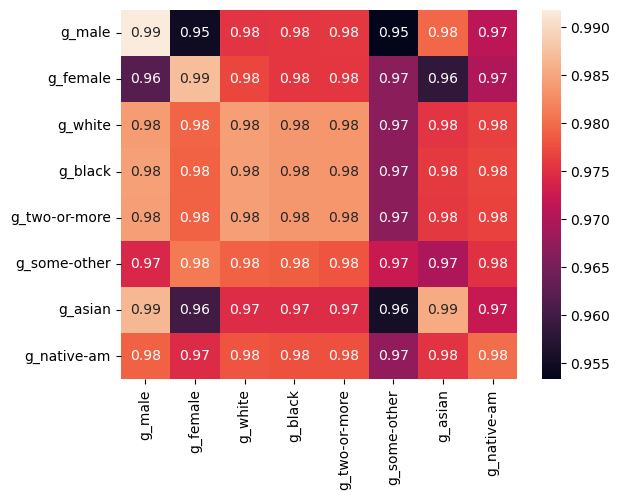

In [23]:
import seaborn as sns # for data visualization
sns.heatmap(crossmat, annot=True, xticklabels=keys, yticklabels=keys)

In [19]:
# df.to_pickle('./synthetic_res_models/dataframes/w0-1_X0-1_linear_racediff.pkl')
df.to_pickle('./synthetic_res_models/dataframes/w0-1_X0-1_ydperm_linearbase2.pkl')

# Online pipeline

In [24]:
from bilevel.OnlineLinearExpert import *
from bilevel.build_all_models import *

In [23]:
# # reproducible seed for uniforms
# params = {'samples': 10000, 'dim':20, 
#         'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
#         'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
#         'feat_lo': 0.0, 'feat_hi': 100.0, 'w_lo': 0.0, 'w_hi': 100.0, 
#         'label_noise_width':100, 'drop_sensitive':True
#         }
# syn_ob = SynthGenLinear(**params)
# df = syn_ob.df

In [36]:
# print(df.columns)
# filter_feature = [col for col in df if col.startswith('x')]
# filter_label = [col for col in df if col.startswith('y')]
# filter_group = [col for col in df if col.startswith('g')]
# print(filter_feature, filter_label, filter_group)

In [25]:
# df['y_min_active'] = df.apply(lambda x: np.min(x['active_labels']), axis=1)
# df['y_max_active'] = df.apply(lambda x: np.max(x['active_labels']), axis =1)
# df['y_mean_active'] = df.apply(lambda x: np.mean(x['active_labels']), axis =1)

In [24]:
# np.sum(syn_ob.A_t, axis = 0), np.sum(syn_ob.A_t, axis=1)

(array([49746., 50254., 60829., 11942., 10037.,  8034.,  6137.,  3021.]),
 array([2., 2., 2., ..., 2., 2., 2.]))

In [25]:
# need to also minmax scale? so that all in 0-1
from bilevel.utils import numeric_scaler
# y_lab = 'y_dperm_active'
# y_lab = 'y_mean_active'
y_lab = 'y_min_active'
# y_lab = 'y_max_active'


X_dat = df[filter_feature]
y_dat = df[[y_lab]]
A_t = syn_ob.A_t

X_dat = numeric_scaler(X_dat, X_dat.columns)
y_dat = numeric_scaler(y_dat, y_dat.columns)
y_dat = y_dat[y_lab]

In [46]:
X_dat.shape, y_dat.shape, A_t.shape

((100000, 20), (100000,), (100000, 8))

In [26]:
dirname = './synthetic_res_models/baseline'
filename = 'weirdquad_leastsq_0-1x_w0-1'+y_lab

In [27]:
exp_ls = OnlineLinearExpert(X_dat, y_dat, l2_pen = 0.0)
b_lsbase = build_baseline_alwayson(dirname, filename, A_t, exp_ls)

100%|██████████| 100000/100000 [01:04<00:00, 1552.97it/s]


In [28]:
dirname = './synthetic_res_models/Anh/'
# filename = 'leastsq_x0-1,w0-100_ymax'
experts_ls = [OnlineLinearExpert(X_dat, y_dat, l2_pen = 0.0) for _ in range(A_t.shape[1])]
b_Anh = build_Anh(dirname, filename, A_t, experts_ls)

100%|██████████| 100000/100000 [02:15<00:00, 739.09it/s]


In [29]:
def Anh_vs_baseline():
    for gnum in range(A_t.shape[1]):
        baseline_cl = b_lsbase.expert.cumloss_groupwise[gnum][-1]
        Anh_cl = b_Anh.Anh.cuml_loss_curve[gnum][-1]
        rounds_active = len(b_Anh.Anh.cuml_loss_curve[gnum])
        print(f'''Group {gnum}, active rounds {rounds_active}, Baseline : {baseline_cl},  Anh : {Anh_cl}''')
        print(f'''Group {gnum}, Avg loss Baseline : {baseline_cl / rounds_active},  Avg loss Anh : {Anh_cl / rounds_active}''')
        print(f'''Is Anh better {Anh_cl <= baseline_cl}''')

In [36]:
# for y_dperm
Anh_vs_baseline()

Group 0, active rounds 49770, Baseline : 362.3248092913538,  Anh : 85.55794575610592
Group 0, Avg loss Baseline : 0.007279984112745707,  Avg loss Anh : 0.001719066621581393
Is Anh better True
Group 1, active rounds 50230, Baseline : 544.9101393321995,  Anh : 239.36145878776898
Group 1, Avg loss Baseline : 0.010848300603866205,  Avg loss Anh : 0.004765308755480171
Is Anh better True
Group 2, active rounds 61069, Baseline : 671.3343972613301,  Anh : 256.2593523656907
Group 2, Avg loss Baseline : 0.010993047164049355,  Avg loss Anh : 0.0041962264383842976
Is Anh better True
Group 3, active rounds 11997, Baseline : 37.95982604885837,  Anh : 5.238484545715704
Group 3, Avg loss Baseline : 0.003164109864871082,  Avg loss Anh : 0.00043664954119494075
Is Anh better True
Group 4, active rounds 9758, Baseline : 48.93690331241036,  Anh : 4.761366608509451
Group 4, Avg loss Baseline : 0.0050150546538645585,  Avg loss Anh : 0.000487944928111237
Is Anh better True
Group 5, active rounds 8065, Baselin

In [44]:
# for y_mean
Anh_vs_baseline()

Group 0, active rounds 49770, Baseline : 165.1095815323938,  Anh : 38.16904955241989
Group 0, Avg loss Baseline : 0.00331745190943126,  Avg loss Anh : 0.0007669087713968232
Is Anh better True
Group 1, active rounds 50230, Baseline : 163.67799111585322,  Anh : 39.45693210906633
Group 1, Avg loss Baseline : 0.0032585703984840376,  Avg loss Anh : 0.0007855252261410777
Is Anh better True
Group 2, active rounds 61069, Baseline : 177.4215528004507,  Anh : 23.24550489577441
Group 2, Avg loss Baseline : 0.002905263763946531,  Avg loss Anh : 0.0003806432870322817
Is Anh better True
Group 3, active rounds 11997, Baseline : 49.43309838130681,  Anh : 19.727592398811325
Group 3, Avg loss Baseline : 0.0041204549788536144,  Avg loss Anh : 0.001644377127516156
Is Anh better True
Group 4, active rounds 9758, Baseline : 35.20261311854664,  Anh : 10.408923079575809
Group 4, Avg loss Baseline : 0.0036075643695989584,  Avg loss Anh : 0.0010667066078679861
Is Anh better True
Group 5, active rounds 8065, Bas

In [30]:
# for y_min
Anh_vs_baseline()

Group 0, active rounds 49852, Baseline : 19.472314632301917,  Anh : 23.56097730829982
Group 0, Avg loss Baseline : 0.0003906024759749241,  Avg loss Anh : 0.0004726184969168703
Is Anh better False
Group 1, active rounds 50148, Baseline : 17.416005734284106,  Anh : 21.414113818729646
Group 1, Avg loss Baseline : 0.0003472921299809385,  Avg loss Anh : 0.0004270183022000807
Is Anh better False
Group 2, active rounds 61182, Baseline : 17.909342838942127,  Anh : 19.458002467401908
Group 2, Avg loss Baseline : 0.00029272241572590187,  Avg loss Anh : 0.0003180347564218546
Is Anh better False
Group 3, active rounds 11997, Baseline : 5.6639799243608016,  Anh : 6.884233643718184
Group 3, Avg loss Baseline : 0.0004721163561190966,  Avg loss Anh : 0.0005738295943751091
Is Anh better False
Group 4, active rounds 10012, Baseline : 3.3305927692960933,  Anh : 4.68430740089253
Group 4, Avg loss Baseline : 0.00033266008482781597,  Avg loss Anh : 0.0004678692969329335
Is Anh better False
Group 5, active r

In [27]:
# for y_max
Anh_vs_baseline()

Group 0, active rounds 49770, Baseline : 359.27756085097064,  Anh : 38.27442259556541
Group 0, Avg loss Baseline : 0.007218757501526434,  Avg loss Anh : 0.0007690259713796547
Is Anh better True
Group 1, active rounds 50230, Baseline : 325.9135993812352,  Anh : 7.535953108785945
Group 1, Avg loss Baseline : 0.00648842523155953,  Avg loss Anh : 0.00015002892910185038
Is Anh better True
Group 2, active rounds 61069, Baseline : 443.6018293221776,  Anh : 17.58765073764522
Group 2, Avg loss Baseline : 0.007263944543421009,  Avg loss Anh : 0.00028799637684660335
Is Anh better True
Group 3, active rounds 11997, Baseline : 66.93810265729141,  Anh : 11.893430283385953
Group 3, Avg loss Baseline : 0.005579570113969443,  Avg loss Anh : 0.0009913670320401728
Is Anh better True
Group 4, active rounds 9758, Baseline : 60.60022423434083,  Anh : 6.077201543518285
Group 4, Avg loss Baseline : 0.006210311973185164,  Avg loss Anh : 0.0006227917138264281
Is Anh better True
Group 5, active rounds 8065, Base

In [32]:
# df.to_pickle('./synthetic_res_models/dataframes/leastsq_x0-1,w0-100uniform.pkl')
df.to_pickle('./synthetic_res_models/dataframes/leastsq_x0-1,w0-1_senspresent.pkl')

In [ ]:
# mask = ma.masked_array(ar, mask=A_t==0), true entries in the bool are masked i.e. not used for computation
# masked_mul = mask * y_labels_mat # gets all the valid labels
# then can do max, min easily, avg easily; ignores the masked ones
#mean_ar = np.mean(masked_mul, axis=1)
#  ma.getdata(mean_ar) to get back the above

# for dominance order->
# can also permute simply masked_mul[:, [column perm]]
# 